In [1]:
import nbimporter
import numpy as np
from map import Map
import time
from organisms import Organism, Plant
from engine import World
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import clear_output

Importing Jupyter notebook from map.ipynb
Importing Jupyter notebook from organisms.ipynb
Importing Jupyter notebook from engine.ipynb


In [2]:
m = Map(20, n_random=50, color='#cccccc')
seeds = [Plant(i, m, delta=0.3, mu=0.5) for i in 
         np.random.randint(0, m.map.shape[0], 1)]

In [3]:
W = World(m, seeds, tile_limit=50)

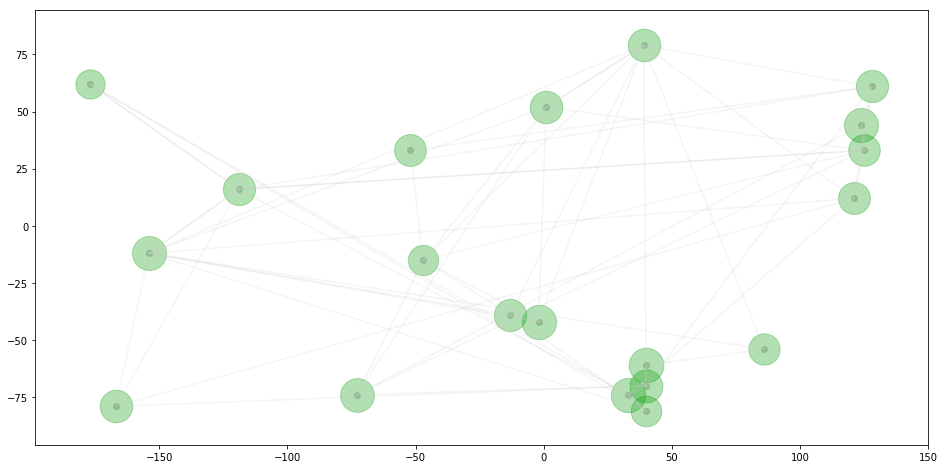

In [4]:
visualize = True
for iteration in W.simulate_death(100):
    print(iteration)
    clear_output(wait=True)
    if visualize:
        fig, ax = plt.subplots(figsize=(16,8))
        W.show(ax)
        plt.show()

In [5]:
S = W.stats()

In [6]:
S.head()

,age,death,gen,lon,lat,gamma,delta,mu,organism
0,35,NaN,15,40,-81,0.348434,0.01,0.1,plant
1,23,NaN,9,40,-81,0.346003,0.01,0.1,plant
2,23,NaN,12,40,-81,0.374041,0.01,0.1,plant
3,20,NaN,6,40,-81,0.351241,0.01,0.1,plant
4,20,NaN,8,40,-81,0.358171,0.01,0.1,plant


In [7]:
S[S.death > 0].head()

,age,death,gen,lon,lat,gamma,delta,mu,organism
1057,10,25.0,0,33,-74,0.051464,0.01,0.1,plant
1058,5,28.0,1,33,-74,0.054279,0.01,0.1,plant
1059,34,34.0,7,40,-81,0.200000,0.30,0.5,plant
1060,4,36.0,0,-154,-12,-0.008750,0.01,0.1,plant
1061,9,37.0,3,40,-81,0.347834,0.01,0.1,plant


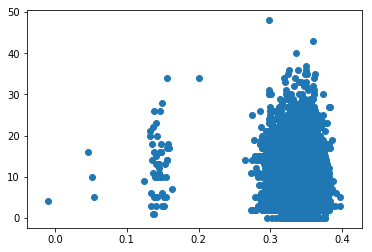

In [8]:
plt.scatter(S.gamma, S.age)
plt.show()

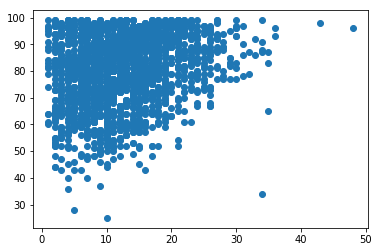

In [9]:
plt.scatter(S.age, S.death)
plt.show()

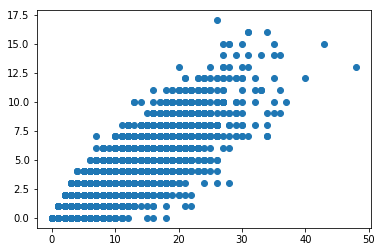

In [10]:
plt.scatter(S.age, S.gen)
plt.show()

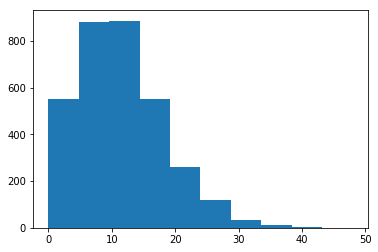

In [11]:
plt.hist(S.age)
plt.show()

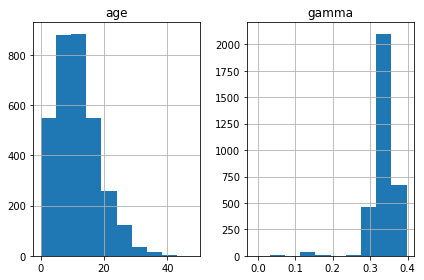

In [12]:
S[['age', 'gamma']].hist()
plt.tight_layout()
plt.show()

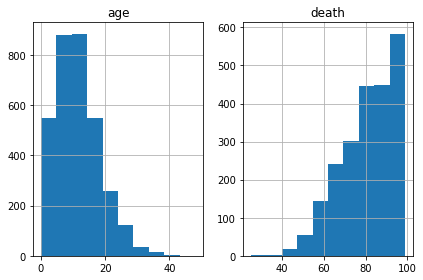

In [13]:
S[['age', 'death']].hist()
plt.tight_layout()
plt.show()

In [14]:
S.corr()

,age,death,gen,lon,lat,gamma,delta,mu
age,1.000000,0.215357,0.819468,-0.029042,0.002634,-0.033893,0.056910,0.056910
death,0.215357,1.000000,0.205624,0.140673,0.095075,0.134671,-0.075533,-0.075533
gen,0.819468,0.205624,1.000000,-0.023693,-0.009824,0.113978,0.019472,0.019472
lon,-0.029042,0.140673,-0.023693,1.000000,0.007089,0.028764,0.008918,0.008918
lat,0.002634,0.095075,-0.009824,0.007089,1.000000,-0.049112,-0.022541,-0.022541
gamma,-0.033893,0.134671,0.113978,0.028764,-0.049112,1.000000,-0.070907,-0.070907
delta,0.056910,-0.075533,0.019472,0.008918,-0.022541,-0.070907,1.000000,1.000000
mu,0.056910,-0.075533,0.019472,0.008918,-0.022541,-0.070907,1.000000,1.000000


In [15]:
S.head()

,age,death,gen,lon,lat,gamma,delta,mu,organism
0,35,NaN,15,40,-81,0.348434,0.01,0.1,plant
1,23,NaN,9,40,-81,0.346003,0.01,0.1,plant
2,23,NaN,12,40,-81,0.374041,0.01,0.1,plant
3,20,NaN,6,40,-81,0.351241,0.01,0.1,plant
4,20,NaN,8,40,-81,0.358171,0.01,0.1,plant


In [16]:
S.to_excel('data/s1.xlsx')